<a href="https://colab.research.google.com/github/JasOlean/LearnPytorch/blob/main/lectures/JH_03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

* see reference - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer Vision

* `torchvision` -base domain library
* `torchvision.datasets` - get datasets and data loading functions for cv
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulationg your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class 
* `torch.utils.data.DataLoader` - creates a python iterable over a  dataset (set dataset batch)

In [ ]:
import torch
from torch import nn

# import torchvision 
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

1.12.0+cu113
0.13.0+cu113


## 1. Getting a dataset

FashionMNIST dataset : torchvision  datasets 

In [ ]:
# setup training data
from torchvision import datasets 
train_data = datasets.FashionMNIST(
    root = 'data', # where to download data to?
    train = True, # do we want training data?
    download = True, # do we want to download the dataset?
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# see firt training example
image, label = train_data[0]
image,label

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of image
print(f'Image shape: {image.shape} -> [color channels, height, weight]')
print(f'Image Labels: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, weight]
Image Labels: Ankle boot


### 1.2 Visualizing data 

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


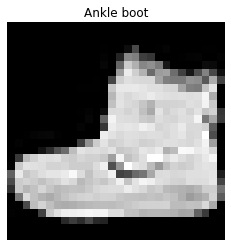

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
print(f'Image label: {class_names[label]}')
plt.imshow(image.squeeze(), cmap='gray')  # only image shape has single dimension
plt.title(class_names[label])
plt.axis(False);  # off show axis 

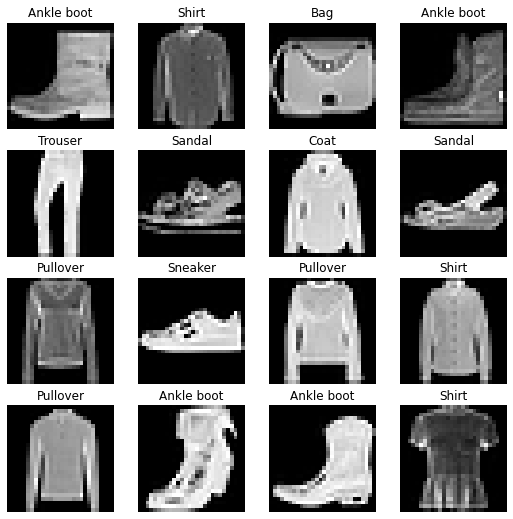

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data),size = [1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure liear lines? 
Or do you think we'll need non-linear lines?

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader 

Dataloader turns out dataset into a python iterable.
so, turn data to mini batches.

Why would we do this?
1. It is more computationally efficient, as in , your computing hardware may not be able to look (store in memory) at 60000 images in one hit. 
So, we break it down to 32 images at a time (batch size of 32).

2. It gives neural network more chancese to update its gradients per epoch. 

In [ ]:
from torch.utils.data import DataLoader
# setup batch size hyperparameter
batch_size = 32 

# turn datasets into iterables()
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = batch_size,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = batch_size,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3d08012810>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3d08012090>)

In [ ]:
#check out dataloader 
print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {batch_size}...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {batch_size}...')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f78ba2fbb90>, <torch.utils.data.dataloader.DataLoader object at 0x7f78ba2fb750>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# check out inside dataloader 
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, Label size: torch.Size([])


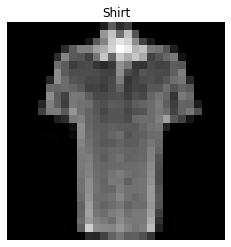

In [ ]:
# show a sample 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, Label size: {label.shape}')

# 3. Model  0: Build a baseline model 

A baseline model is a simple model you will try and improve upon with subsequent models/experiments. 
In other words, start simply and add complexity when necessary.

In [ ]:
# create a flatten layer 
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# flatten the sample 
output = flatten_model(x) # perform forward pass

#print out 
print(f'Shape before flattened: {x.shape} -> [color channels, height, weight]')
print(f'Shape after flattened: {output.shape} -> [color channels, height * weight]')

Shape before flattened: torch.Size([1, 28, 28]) -> [color channels, height, weight]
Shape after flattened: torch.Size([1, 784]) -> [color channels, height * weight]


In [ ]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features = input_shape, out_features = hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
  )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42) 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)
).to(device)

model_0, model_0.state_dict()

(FashionMNISTModelV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('l

In [ ]:
dummy_x  = torch.rand([1,1,28,28]).to(device)
 
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 3.1 setup loss, optimizer and evaluation metrics 

* loss function - for multi-class, `nn.CrossEntropyLoss`
* Optimizer 
* Evaluation Metrics - accuracy 

In [ ]:
# call accuracy function from helper_functions.py 
import requests
from pathlib import Path 

# download helper_functions.py from github repo 
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exist, skipping download..')
else:
  print('Downloading helper_functions.py...')
  request = requests.get('https://raw.githubusercontent.com/JasOlean/LearnPytorch/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

In [ ]:
# import acc metric 
from helper_functions import accuracy_fn

# setup loss function 
loss_fn = nn.CrossEntropyLoss()

# optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments 

Two of main thing to track:
1. Model's performance (loss and accuracy,etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start 
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time 

In [ ]:
start_time = timer()
#some_code...
end_time = timer()
print_train_time(start_time, end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


1.4130000010936783e-05

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calcuate train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate test loss **per batch**.
4. Print out what's happening.
5. Time it all (for fun).


In [ ]:
# import tqdm for progress bar 
from tqdm.auto import tqdm 

#set the seed and start the timer
torch.manual_seed(42) 
start_train_time = timer() 

# set the number of epochs
epochs = 3 

# create training and test loop 
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')
  ###Training 
  train_loss = 0 
  
  # add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train() 
    X,y = X.to(device), y.to(device)
    #1. forward pass
    y_pred = model_0(X) 

    # 2. calculate loss 
    loss = loss_fn(y_pred,y) 
    train_loss += loss 

    # 3. zero grad()
    optimizer.zero_grad()

    # 4. loss backpropagation
    loss.backward() 

    # 5. update gradient descent 
    optimizer.step() 

    # Print out 
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.')
  
  # Divide total train loss by length of train dataloader 
  train_loss /= len(train_dataloader)

  ## Testing 
  test_loss, test_acc = 0,0 
  model_0.eval() 
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test = X_test.to(device), y_test.to(device)
      test_pred =  model_0(X_test)
      test_loss += loss_fn(test_pred, y_test) 
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
    # calculate test loss average per batch 
    test_loss /= len(test_dataloader)

    # calculate test acc per batch 
    test_acc /= len(test_dataloader)
  
  # print out 
  print(f'Train Loss: {train_loss:.4f}  | Test loss: {test_loss:.4f}, Test acc: {test_acc:.3f}\n')

# calculate training time 
end_train_time = timer() 
total_train_time_model_0 = print_train_time(start_train_time, end_train_time, device = str(next(model_0.parameters()).device))

## 4. Make predictions and get model_0 results 

In [ ]:
torch.manual_seed(42) 

def  eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device:torch.device=device):
  """Returns a dictionary containing the results of model prediction on data loader."""
  loss, acc = 0, 0
  model.eval() 
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device), y.to(device)
      y_pred = model(X) 
      loss += loss_fn(y_pred,y) 
      acc += accuracy_fn(y, y_pred.argmax(dim=1)) 

    # scale loss and acc to find average loss/acc per batch 
    loss /= len(data_loader)
    acc /= len(data_loader) 
  
  return {'model_name': model.__class__.__name__, # only works when model was creatd with a class
          'model_loss': loss.item(),
          'model_acc': acc}


#calculate model_0 results on test_dataset 
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 10.852635782747603,
 'model_loss': 2.3190648555755615,
 'model_name': 'FashionMNISTModelV0'}

## 5. Setup device agnostic-code (for using a GPU if there is one)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cuda'

## 6. Model 1: building a better model with non-linearlity



In [ ]:
# create a nonlinear model
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, 
                out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, 
                out_features=output_shape),
      nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x) 

In [ ]:
# create an instance of model_1
model_1 = FashionMNISTModelV1(input_shape = 784,
                              output_shape = len(class_names),
                              hidden_units = 10).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss function and optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2 Setup Training and evaluation/testing loops 

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  #Put model into training mode 
  model.train()

  #train on each batch size 
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)
    
    # 2. calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # 3. zero grad() 
    optimizer.zero_grad() 

    # 4. backpropagation
    loss.backward() 

    # 5. update gradient descent 
    optimizer.step() 

  # divide total train loss and acc by len of train dataloader 
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.4f}  | Train acc: {train_acc:.2f}%')
  

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0

  #put the model in eval mode
  model.eval()

  with torch.inference_mode(): 
    for X_test,y_test in data_loader:

      X_test,y_test = X_test.to(device), y_test.to(device) 
      test_pred = model(X_test)
      loss = loss_fn(test_pred, y_test)
      test_loss += loss
      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

    #Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)  
    print(f'Test loss: {test_loss:.4f}  | Test acc: {test_acc:.2f}\n')

In [ ]:
torch.manual_seed(42) 

# measuer time start and end 
from timeit import default_timer as timer
train_start_time = timer()

# set epoch 
epochs = 3

#create optimization and evaluation loop 
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n---------')
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            optimizer = optimizer,
            accuracy_fn = accuracy_fn,
            device = device)
  
train_end_time = timer()
total_train_time_model_1=print_train_time(start= train_start_time,
                                  end = train_end_time,
                                  device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.1146  | Train acc: 58.46%
Test loss: 0.9632  | Test acc: 63.41

Epoch: 1
---------
Train loss: 0.9091  | Train acc: 64.87%
Test loss: 0.7454  | Test acc: 72.61

Epoch: 2
---------
Train loss: 0.5951  | Train acc: 78.25%
Test loss: 0.4971  | Test acc: 82.77

Train time on cuda: 31.125 seconds


In [ ]:
total_train_time_model_0 , total_train_time_model_1

(23.439084928, 31.124915294000004)

### **Note**: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than GPU.



In [ ]:
# Get model_1 results dictionary format 
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 82.76757188498402,
 'model_loss': 0.49707889556884766,
 'model_name': 'FashionMNISTModelV1'}

## Model 2: Building a Convolutional Neural Network(CNN) 

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see - https://poloclub.github.io/cnn-explainer/

In [ ]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model 
  from CNN explainer website.
  """
  def __init__(self, input_shape: int, output_shape :int, hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, 
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)                  
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, #there is a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    #print(f'Output shape of classifier: {x.shape}')
    return x

In [ ]:
torch.manual_seed(42) 
model_2 = FashionMNISTModelV2(input_shape = 1,
                              output_shape = len(class_names),
                              hidden_units= 10).to(device)

In [ ]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#create random tensor 
random_tensor = torch.randn(size=(1,28,28))
random_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`



In [ ]:
torch.manual_seed(42) 

#create a batch of image 
images = torch.randn([32,3,64,64])
test_image = images[0]
images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [ ]:
torch.manual_seed(42)
 
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# print out original image shape 
print(f'Test image original shape: {test_image.shape}')

#create a sample nn.MaxPool2d() 
pooling_layer = nn.MaxPool2d(kernel_size=4)

# pass data through conv_layer 
test_image_through_conv = conv_layer(test_image)
print(f'Shape after through conv_layer(): {test_image_through_conv.shape}')

#pass data through max pool layer 
test_image_through_conv_through_max = pooling_layer(test_image_through_conv)
print(f'Shape after through conv_layer() through pool layer(): {test_image_through_conv_through_max.shape}')

Test image original shape: torch.Size([3, 64, 64])
Shape after through conv_layer(): torch.Size([10, 64, 64])
Shape after through conv_layer() through pool layer(): torch.Size([10, 16, 16])


In [ ]:
torch.manual_seed(42)

#create a random tensor with similar of dimensions to our images 
random_tensor = torch.randn(size=(1,2,2)).unsqueeze(0)
print(random_tensor)
print(f'Random tensor shape: {random_tensor.shape}')
#create  max pool layer 
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor) 
print(f'\nMax pool tensor: \n {max_pool_tensor}')
print(f'Max pool tensor shape: \n {max_pool_tensor.shape}')


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: 
 torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

### 7.4 Training and testing `model_2` using our training and test functiomm

In [ ]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

#measure time
from timeit import default_timer as timer

train_start_time = timer()

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n---------')
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            optimizer = optimizer,
            accuracy_fn = accuracy_fn,
            device = device)

train_end_time = timer()
total_train_time_model_2 = print_train_time(start = train_start_time,
                                            end = train_end_time,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.5940  | Train acc: 78.43%
Test loss: 0.3846  | Test acc: 86.30

Epoch: 1
---------
Train loss: 0.3597  | Train acc: 87.03%
Test loss: 0.3538  | Test acc: 86.71

Epoch: 2
---------
Train loss: 0.3230  | Train acc: 88.26%
Test loss: 0.3157  | Test acc: 88.52

Train time on cuda: 43.239 seconds


In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 9.994009584664537,
 'model_loss': 2.3023064136505127,
 'model_name': 'FashionMNISTModelV2'}

## 8. Comparing the results and training time 

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.497079,82.767572
2,FashionMNISTModelV2,0.315657,88.518371


In [ ]:
# Add training time to results comparison 
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results                                    

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,23.439085
1,FashionMNISTModelV1,0.497079,82.767572,31.124915
2,FashionMNISTModelV2,0.315657,88.518371,43.239268


Text(0, 0.5, 'model')

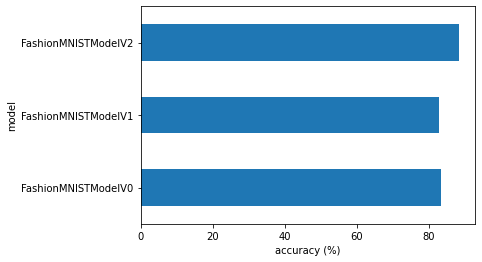

In [ ]:
# Visualize model results 
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

## 9. Make and evaluate random predictions with best model 

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      
      #prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  
  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):  # k is no.of samples among list(test_data)
  test_samples.append(sample) # each sample has shape[1,28,28]
  test_labels.append(label)

# view the first sample shape 
test_samples[0].shape, test_samples[0].squeeze().shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

Text(0.5, 1.0, 'Sandal')

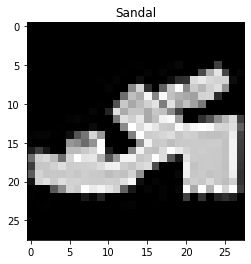

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray') #sample shape has to be 2dimension
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions
pred_probs = make_predictions(model = model_2,
                      data= test_samples)

# view first two prediciton probability
print(len(test_samples))
print(pred_probs[:2])

# convert pred_probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

NameError: ignored

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

NameError: ignored

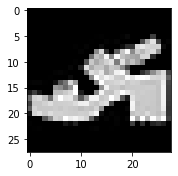

In [ ]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3 
ncols = 3
for i, sample in enumerate(test_samples):
  #creat subplot
  plt.subplot(nrows,ncols,i+1)

  #plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')

  #find the prediciton (in text form, e.g 'sandal')
  pred_label = class_names[pred_classes[i]]

  # get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text  = f'Pred: {pred_label}  | Truth: {truth_label}'

  #check for equality between pred and truth and change color of title text 
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g') #green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c='r')
  
  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a way of evaluating your classification  models visually. 

1. Make predictions with our trained model on the test dataset 
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# import tqdm.auto 
from tqdm.auto import tqdm 

# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predicitons...'):
    X,y = X.to(device), y.to(device)

    y_logit = model_0(X)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1) 

    y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor 
#print(y_preds)
y_pred_tensor = torch.cat(y_preds) # torch.cat : y_preds into single tensor
y_pred_tensor[:10]

Making predicitons...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([2, 6, 6, 0, 4, 0, 0, 3, 2, 6])

In [ ]:
# see if required packages are installed and if not, install them..
try:
  import  torchmetrics, mlxtend 
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend 
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')

mlxtend version: 0.20.0


In [ ]:
int(mlxtend.__version__.split('.')[1])

20

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

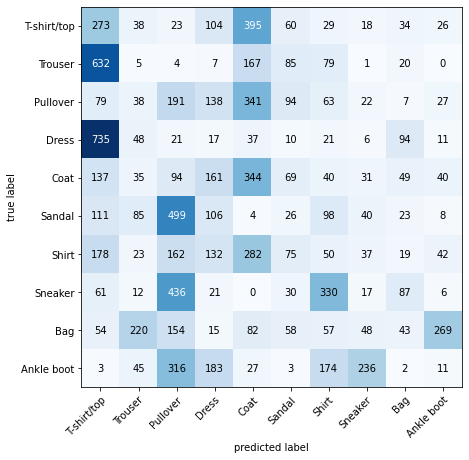

In [ ]:
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
# 3. Plot the confusion matrix 
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,7)
)

## 11. Save and load best performing model 



In [ ]:
from pathlib import Path 

MODEL_DIR  = Path('model')
MODEL_DIR.mkdir(parents= True,
                exist_ok = True)
MODEL_NAME = '03_Pytorch_computer_vision_model_0.pt'
MODEL_SAVE_PATH = MODEL_DIR / MODEL_NAME

#savde model to path 
print(f'Saving model to the path : {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to the path : model/03_Pytorch_computer_vision_model_0.pt


In [ ]:
# create a new instance model 
torch.manual_seed(42)

instance_model_0 = FashionMNISTModelV0(input_shape = 784,
                                       output_shape = len(class_names),
                                       hidden_units=10)

#load in the save state_dict()
instance_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_0_results

{'model_acc': 10.852635782747603,
 'model_loss': 2.3190648555755615,
 'model_name': 'FashionMNISTModelV0'}

In [ ]:
# Evaluate loaded model 
torch.manual_seed(42) 

instance_model_0_results = eval_model(
    model = instance_model_0,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

instance_model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_acc': 10.852635782747603,
 'model_loss': 2.3190648555755615,
 'model_name': 'FashionMNISTModelV0'}

In [ ]:
model_2_results

{'model_acc': 9.994009584664537,
 'model_loss': 2.3023064136505127,
 'model_name': 'FashionMNISTModelV2'}

In [ ]:
# check if model results are close to each other 
torch.isclose(torch.tensor(model_0_results['model_loss']),
              torch.tensor(instance_model_0_results['model_loss']),
              atol = 1e-02 ) # absolute tolerance for errors

tensor(True)